<a href="https://colab.research.google.com/github/siddharth0517/ExpressionAI-Detecting-Human-Emotions-via-CNN/blob/main/ExpressionAI_Detecting_Human_Emotions_via_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/subhaditya/fer2013plus')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: siddharthjaiswalvns
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/subhaditya/fer2013plus


100%|██████████| 132M/132M [00:04<00:00, 30.2MB/s]


# Importing Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Data Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


train_dir = '/content/fer2013plus/fer2013plus/fer2013/train'
val_dir = '/content/fer2013plus/fer2013plus/fer2013/test'


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)


Found 28386 images belonging to 8 classes.
Found 7099 images belonging to 8 classes.


# Building the CNN Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,976 (1.36 MB)

 Trainable params: 355,976 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


887/887 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.3423 - loss: 1.6518 - val_accuracy: 0.3825 - val_loss: 1.5872
Epoch 2/10
  1/887 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4375 - loss: 1.5865

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4375 - loss: 1.5865 - val_accuracy: 0.1852 - val_loss: 1.6193
Epoch 3/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.3779 - loss: 1.5722 - val_accuracy: 0.4307 - val_loss: 1.5054
Epoch 4/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4375 - loss: 1.5417 - val_accuracy: 0.4815 - val_loss: 1.4179
Epoch 5/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.3988 - loss: 1.5321 - val_accuracy: 0.4887 - val_loss: 1.3852
Epoch 6/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 0s 21us/step - accuracy: 0.5312 - loss: 1.3960 - val_accuracy: 0.5556 - val_loss: 1.4485
Epoch 7/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.4462 - loss: 1.4463 - val_accuracy: 0.5875 - val_loss: 1.1773
Epoch 8/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.3750 - loss: 1.5685 - val_accuracy: 0.4815 - val_loss: 1.2281
Epoch 9/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.5209 - loss: 1.3255 - val_accuracy: 0.6

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=25
)

Epoch 1/25
887/887 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.5546 - loss: 1.2368 - val_accuracy: 0.6526 - val_loss: 1.0018
Epoch 2/25
887/887 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.6562 - loss: 0.9358 - val_accuracy: 0.5926 - val_loss: 1.3040
Epoch 3/25
887/887 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.5860 - loss: 1.1732 - val_accuracy: 0.6605 - val_loss: 0.9758
Epoch 4/25
887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5938 - loss: 1.1335 - val_accuracy: 0.4815 - val_loss: 1.1462
Epoch 5/25
887/887 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.5996 - loss: 1.1336 - val_accuracy: 0.6807 - val_loss: 0.9119
Epoch 6/25
887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5625 - loss: 1.5806 - val_accuracy: 0.6667 - val_loss: 0.9005
Epoch 7/25
887/887 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.6155 - loss: 1.0922 - val_accuracy: 0.6847 - val_loss: 0.9088
Epoch 8/25
887/887 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6562 - loss: 0.9411 - val_acc

# Validating the Project

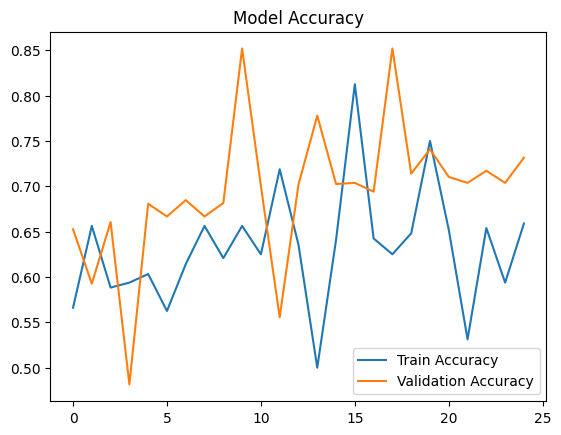

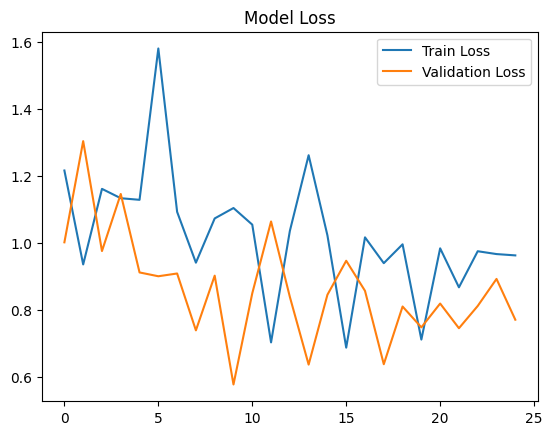

In [9]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [11]:
model.save('emotion_model.keras')